# Chicago Taxi Rides Before and After Covid 19

I conduct analysis using the daily number of rides I created from raw data (that I stored in AWS S3, crawled using AWS Glue and ran SQL using AWS Athena).

### Import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

I import daily data for two years. 

In [2]:
dat2019= pd.read_csv("taximonthday2019.csv")
dat2020= pd.read_csv("taximonthday2020.csv")

dat2019['year'] = 2019
dat2020['year'] = 2020

dat2019['temp_date'] = dat2019['year'].astype(str)+ "-" + dat2019['month'].astype(str) + "-" + dat2019['day'].astype(str)
dat2019['month_day'] = dat2019['month'].astype(str) + "-" + dat2019['day'].astype(str)

dat2019['rideNum'] = dat2019['_col0']
dat2020['rideNum'] = dat2020['_col0']

### Explore data 

Now I explore the data

In [3]:
dat2019

,_col0,month,day,year,temp_date,month_day,rideNum
0,297010,1,1,2019,2019-1-1,1-1,297010
1,213631,1,2,2019,2019-1-2,1-2,213631
2,226495,1,3,2019,2019-1-3,1-3,226495
3,277396,1,4,2019,2019-1-4,1-4,277396
4,296107,1,5,2019,2019-1-5,1-5,296107
...,...,...,...,...,...,...,...
360,261772,12,27,2019,2019-12-27,12-27,261772
361,292073,12,28,2019,2019-12-28,12-28,292073
362,246370,12,29,2019,2019-12-29,12-29,246370
363,255999,12,30,2019,2019-12-30,12-30,255999


In [4]:
dat2019['rideNum'].mean()

306440.39452054794

In [5]:
dat2020['rideNum'].mean()

136642.46721311475

### Average 

I generate monthly average rides for each year. 

In [6]:
monthlyavg2019 = dat2019.groupby('month')['rideNum'].mean()
monthlyavg2020 = dat2020.groupby('month')['rideNum'].mean()

monthlyavg2019.columns = ['month','number']

In [7]:
monthlyavg2019

month
1     283386.548387
2     316046.964286
3     331262.677419
4     307060.366667
5     313125.516129
6     317293.100000
7     294800.645161
8     303456.096774
9     297213.400000
10    306468.354839
11    310181.566667
12    298112.290323
Name: rideNum, dtype: float64

In [8]:
monthlyavg2020

month
1     284028.225806
2     312540.896552
3     171604.096774
4      51448.000000
5      61685.387097
6      89095.133333
7     110317.258065
8     113065.709677
9     121387.566667
10    128908.258065
11    100163.333333
12    100863.193548
Name: rideNum, dtype: float64

The unit of rides is one thousdands for label in the graph

In [9]:
count2019 = monthlyavg2019/1000
count2020 = monthlyavg2020/1000

### Plotting

Now, I plot the monthly average rides for each year

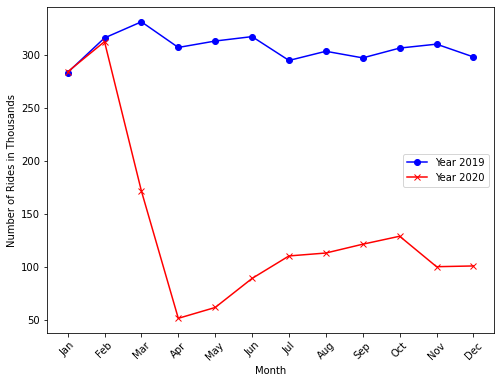

In [10]:
# Set figure

plt.figure(figsize=(8,6))

# Plot

dates = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(dates,count2019,color='blue', marker='o')
plt.plot(dates,count2020,color='red', marker='x')
plt.legend(['Year 2019', 'Year 2020'], loc='center right')
# Labels
plt.xlabel("Month")
plt.ylabel("Number of Rides in Thousands")

# Setting Ticks
plt.tick_params(axis='x',labelsize=10,rotation=45)

# Display
plt.show()

As you can see in the graph, I find clear decrease in the number of rides starting in March. The number of rides is the lowest in April but rebounds starting from May. 